In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [2]:
data =pd.read_csv("/content/winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
set(data.quality). ## classes of target variable

{3, 4, 5, 6, 7, 8}

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Correlation matrix among all features **

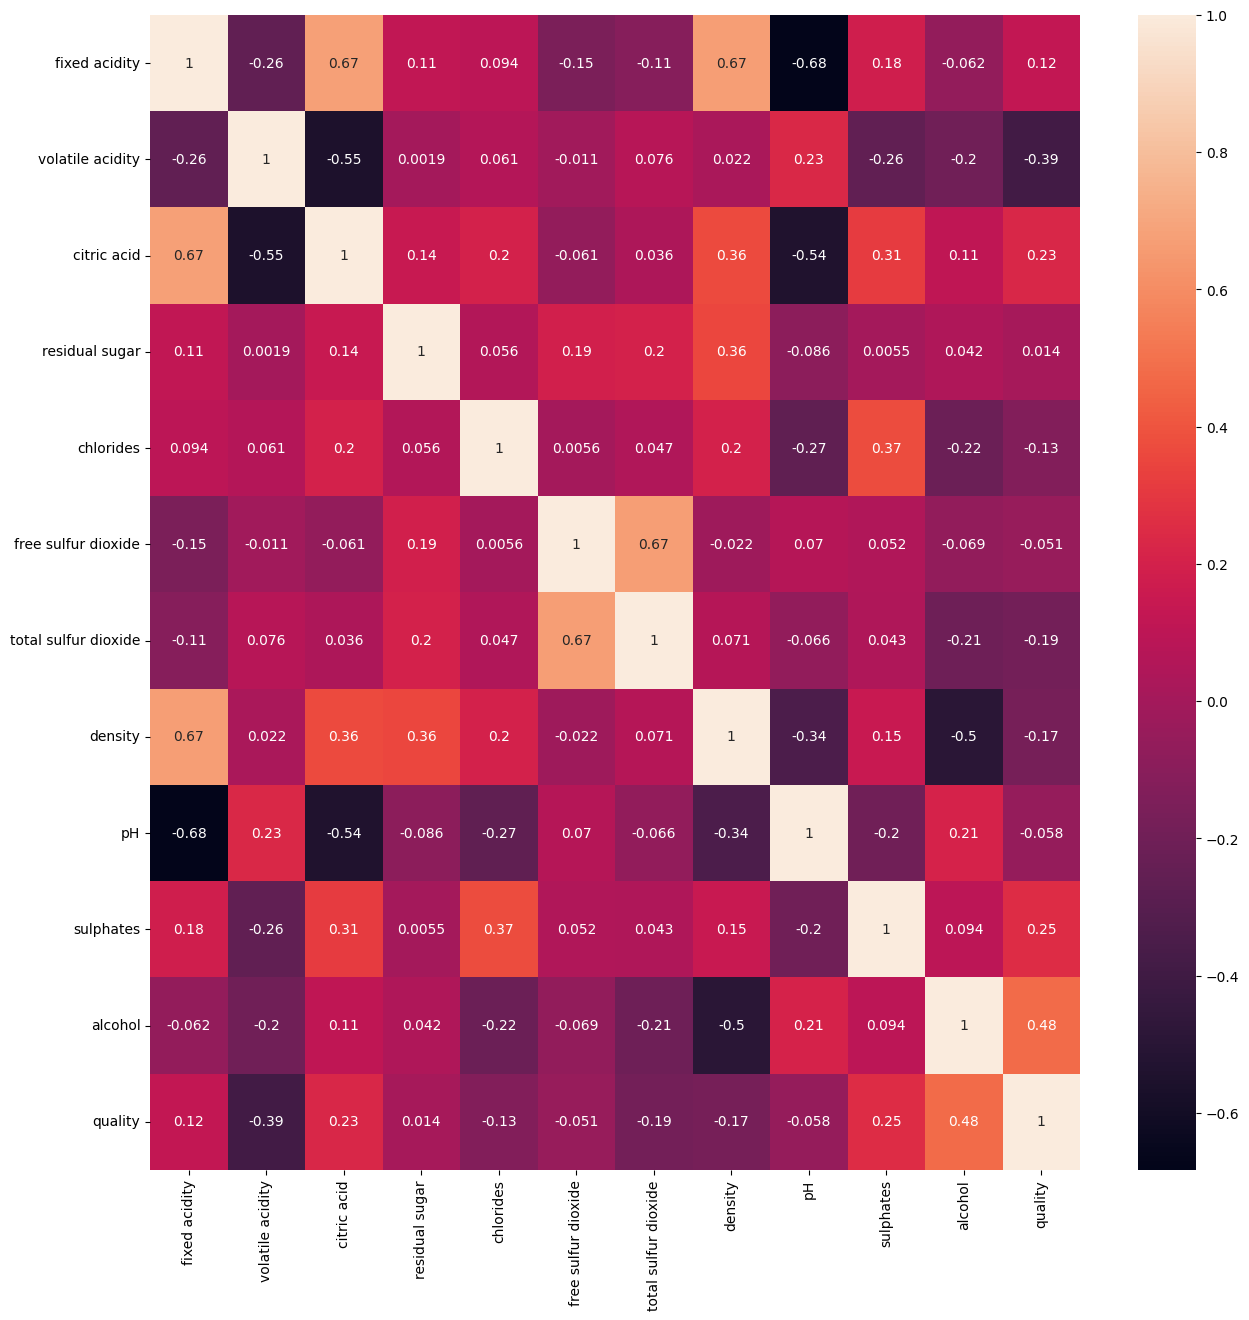

In [7]:
plt.figure(figsize=(15,15))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()


**No variable are correlated to each other, so no need to remove any features in above**

In [10]:
##Detection of outliers, if value is greater than 3 =>  its outlier
z = np.abs(stats.zscore(data))
threshold = 3
print(np.where(z > 3))


(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [11]:
## remove records with z is greater than 3 (outlier)
new_data = data[(z < 3).all(axis=1)]
new_data.shape

(1451, 12)

In [12]:
data.shape

(1599, 12)

In [17]:
## Split train & test
x = new_data.drop('quality',axis=1)
y = new_data['quality']
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [18]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) ## split data

In [24]:
rf_classificationmodel = RandomForestClassifier(n_estimators = 100)
rf_classificationmodel.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
## prediction using model
y_pred = rf_classificationmodel.predict(x_test)

In [27]:
y_pred

array([7, 5, 5, 6, 6, 5, 6, 5, 6, 5, 7, 6, 5, 6, 6, 7, 6, 6, 6, 5, 5, 5,
       5, 5, 7, 6, 6, 7, 5, 5, 7, 5, 6, 5, 5, 6, 6, 6, 5, 5, 7, 7, 6, 6,
       6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 6, 5, 5, 7, 6, 6, 5, 5, 6, 5, 5, 6,
       5, 6, 6, 7, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5,
       5, 7, 5, 6, 6, 7, 5, 6, 6, 6, 7, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 7, 5, 6, 7, 5, 6, 6, 7, 6, 6, 7,
       5, 6, 5, 6, 5, 6, 5, 5, 7, 6, 6, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 7, 6, 5, 6, 6, 6, 7, 6, 5, 6, 6,
       6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 6, 7, 6, 5, 6, 5, 6, 6, 6, 6, 7, 5,
       6, 5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 5, 6, 7, 6, 7, 5, 5, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 6, 6])

In [29]:
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.6769759450171822


[Text(0.4267848966509681, 0.9705882352941176, 'x[1] <= 0.405\ngini = 0.624\nsamples = 724\nvalue = [32, 532, 453, 128, 15]'),
 Text(0.15689593144950287, 0.9117647058823529, 'x[9] <= 0.635\ngini = 0.675\nsamples = 207\nvalue = [6, 81, 142, 85, 10]'),
 Text(0.2918404140502355, 0.9411764705882353, 'True  '),
 Text(0.08686551543694401, 0.8529411764705882, 'x[10] <= 11.85\ngini = 0.613\nsamples = 70\nvalue = [5, 52, 53, 11, 0]'),
 Text(0.04395604395604396, 0.7941176470588235, 'x[2] <= 0.395\ngini = 0.562\nsamples = 56\nvalue = [5, 52, 36, 3, 0]'),
 Text(0.01988487702773417, 0.7352941176470589, 'x[5] <= 4.5\ngini = 0.554\nsamples = 28\nvalue = [5, 9, 26, 2, 0]'),
 Text(0.00837257980115123, 0.6764705882352942, 'x[4] <= 0.088\ngini = 0.375\nsamples = 2\nvalue = [3, 0, 1, 0, 0]'),
 Text(0.004186289900575615, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(0.012558869701726845, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [3, 0, 0, 0, 0]'),
 Text(0.0313971

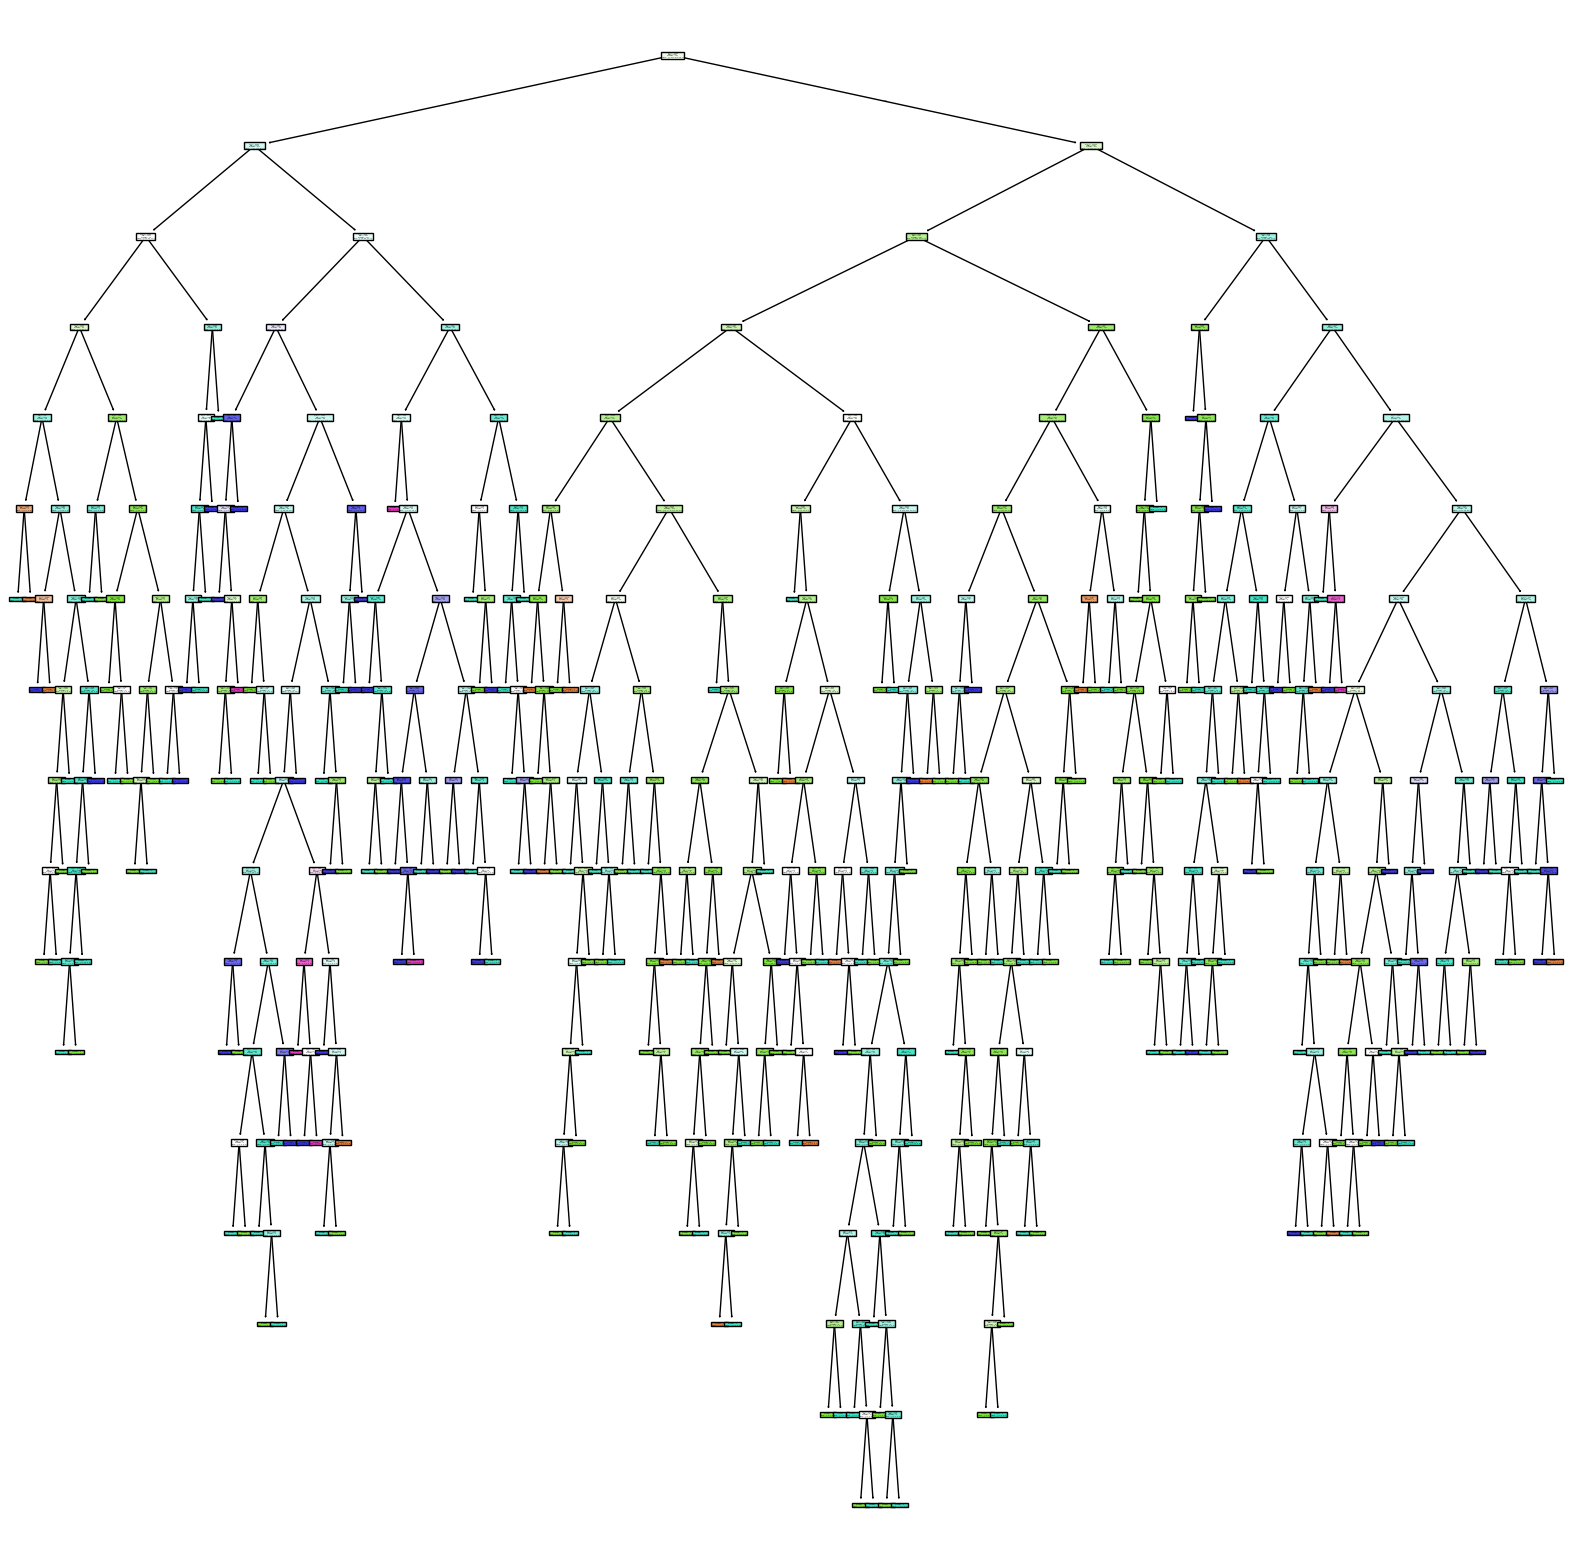

In [35]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf_classificationmodel.estimators_[0], filled = True)
#

In [36]:
# prompt: gridsearch cv parameter tunning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classificationmodel = RandomForestClassifier(random_state=42) # Use random_state for reproducibility

grid_search = GridSearchCV(estimator=rf_classificationmodel, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)
print("Accuracy score on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy score: 0.6965517241379311
Accuracy score on test set: 0.6769759450171822
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.70      0.72      0.71       120
           6       0.63      0.76      0.69       116
           7       0.77      0.57      0.66        40
           8       0.00      0.00      0.00         4

    accuracy                           0.68       291
   macro avg       0.42      0.41      0.41       291
weighted avg       0.65      0.68      0.66       291



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
